In [4]:
## read data function 
readData <- function(path.name, file.name, column.types, missing.types) {
  read.csv( paste(path.name, file.name, sep=""), 
            colClasses=column.types,
            na.strings=missing.types )
}

Titanic.path <- "~/notebooks/kaggle-titanic/"
train.data.file <- "train.csv"
test.data.file <- "test.csv"
missing.types <- c("NA", "")
train.column.types <- c('integer',   # PassengerId
                        'factor',    # Survived 
                        'factor',    # Pclass
                        'character', # Name
                        'factor',    # Sex
                        'numeric',   # Age
                        'integer',   # SibSp
                        'integer',   # Parch
                        'character', # Ticket
                        'numeric',   # Fare
                        'character', # Cabin
                        'factor'     # Embarked
)
test.column.types <- train.column.types[-2]     # # no Survived column in test.csv

## train
train.raw <- readData(Titanic.path, train.data.file, 
                      train.column.types, missing.types)
df.train <- train.raw

## test
test.raw <- readData(Titanic.path, test.data.file, 
                     test.column.types, missing.types)
df.infer <- test.raw   

In [5]:
head(df.train)
head(df.infer)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NA,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NA,S
3,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NA,Q
4,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NA,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NA,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,NA,S


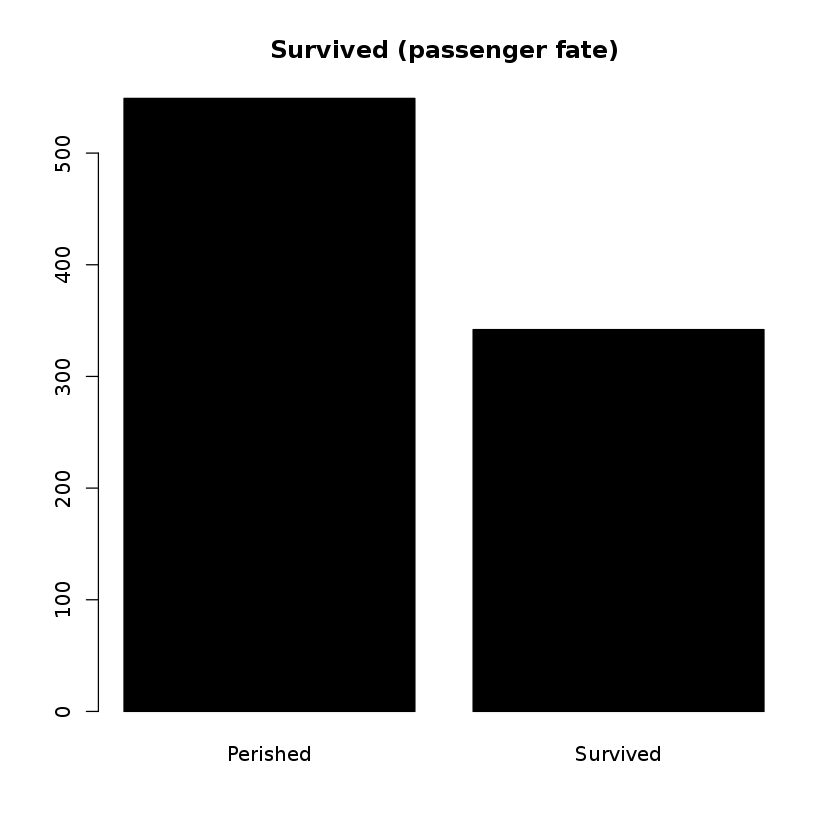

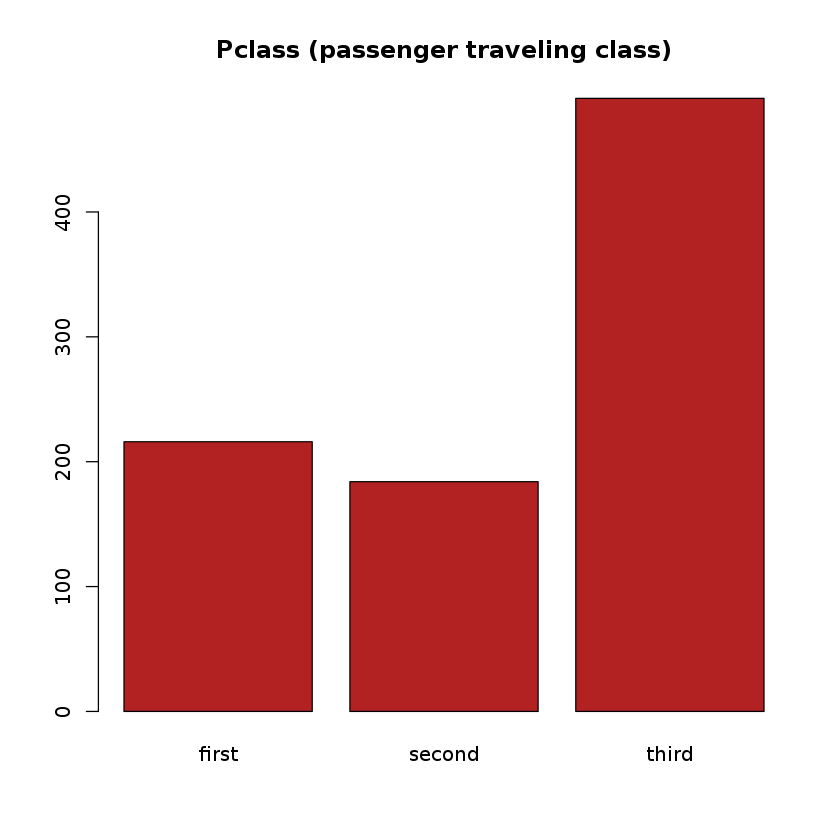

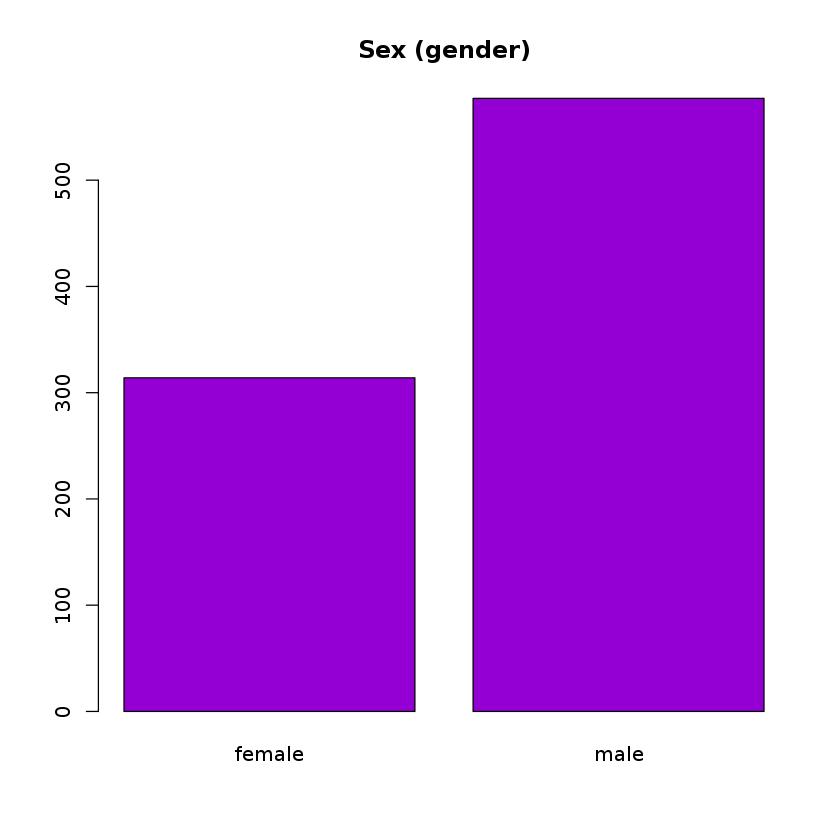

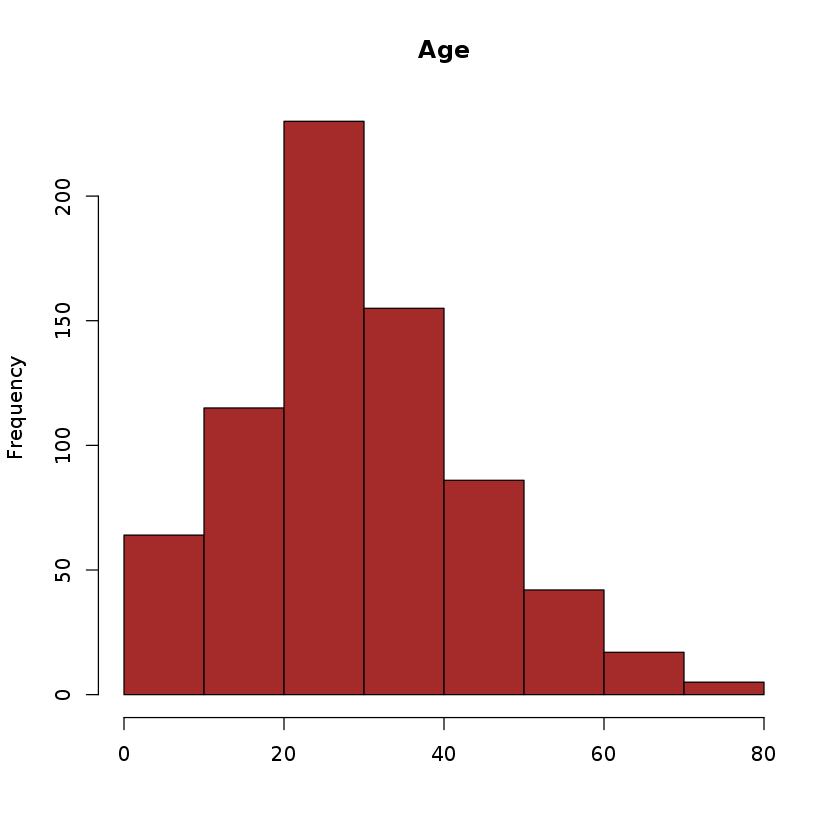

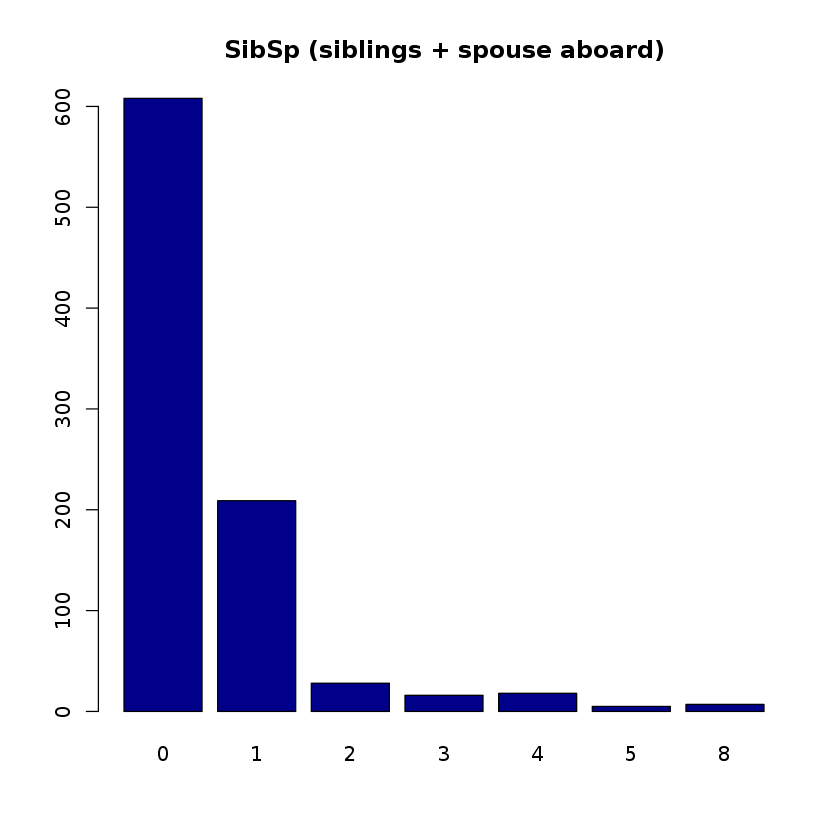

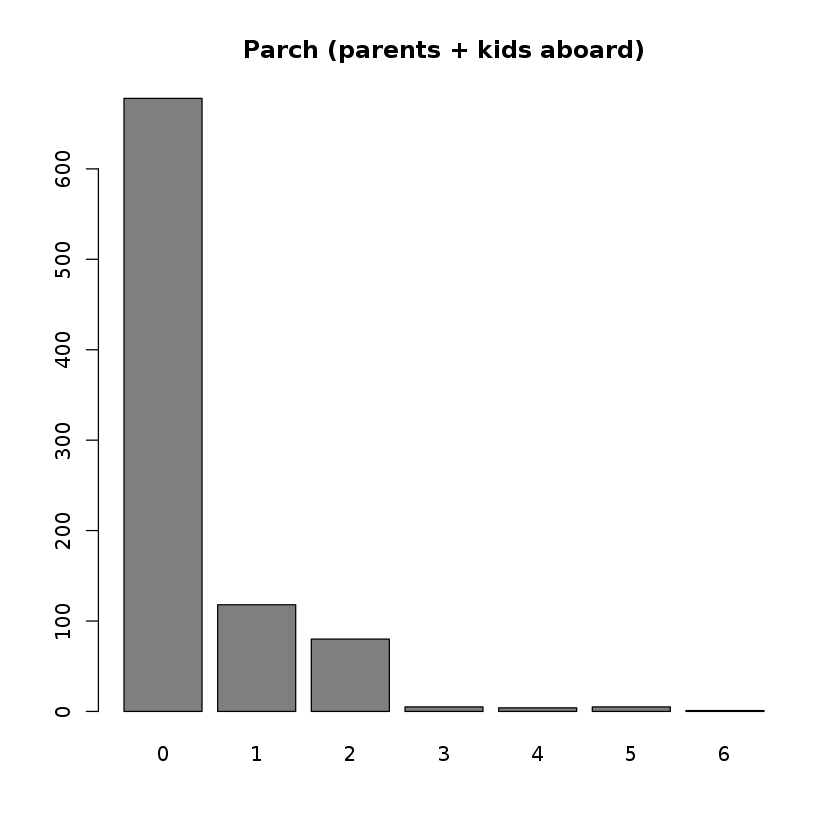

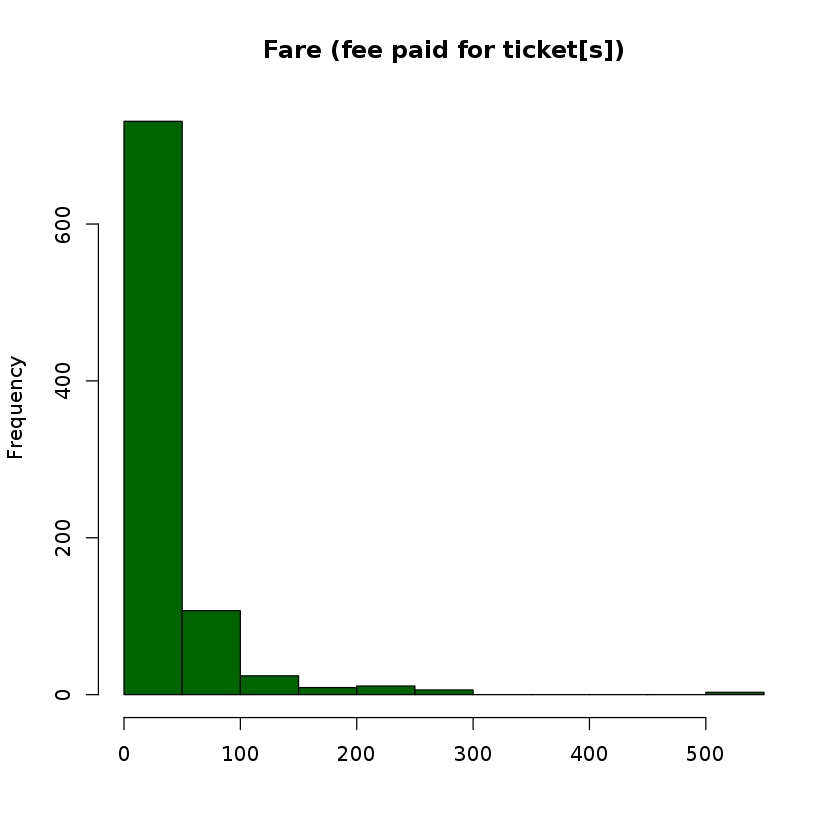

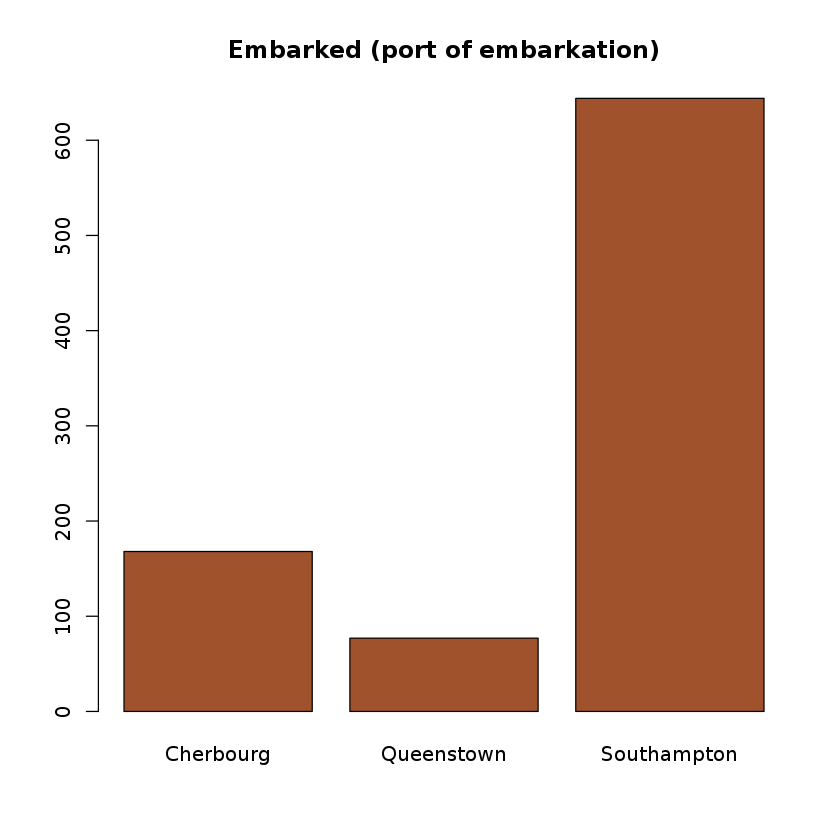

In [6]:
# survied
barplot(table(df.train$Survived), names.arg = c("Perished", "Survived"), main="Survived (passenger fate)", col="black")

#travel class
barplot(table(df.train$Pclass), 
        names.arg = c("first", "second", "third"),
        main="Pclass (passenger traveling class)", col="firebrick")

#sex gender
barplot(table(df.train$Sex), main="Sex (gender)", col="darkviolet")

#age
hist(df.train$Age, main="Age", xlab = NULL, col="brown")

# siblings
barplot(table(df.train$SibSp), main="SibSp (siblings + spouse aboard)", col="darkblue")

# parch parents+kids
barplot(table(df.train$Parch), main="Parch (parents + kids aboard)", col="gray50")

# fees
hist(df.train$Fare, main="Fare (fee paid for ticket[s])", xlab = NULL, col="darkgreen")

# embarked
barplot(table(df.train$Embarked), names.arg = c("Cherbourg", "Queenstown", "Southampton"), 
        main="Embarked (port of embarkation)", col="sienna")

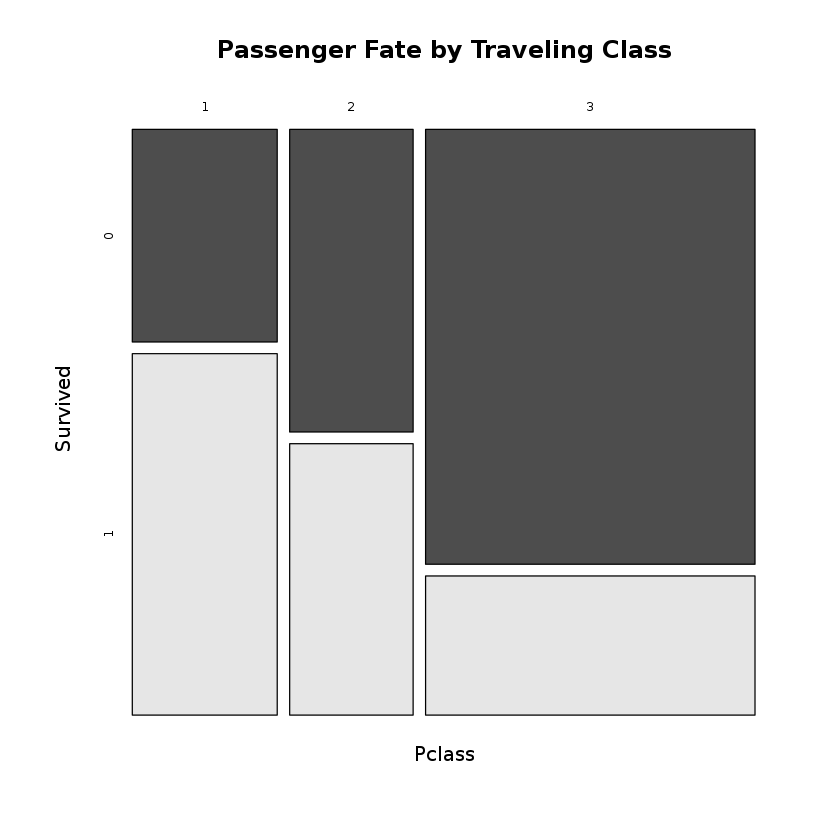

In [7]:
# Passenger Fate by Traveling Class
mosaicplot(df.train$Pclass ~ df.train$Survived,
           main="Passenger Fate by Traveling Class", shade=FALSE, 
           color=TRUE, xlab="Pclass", ylab="Survived")

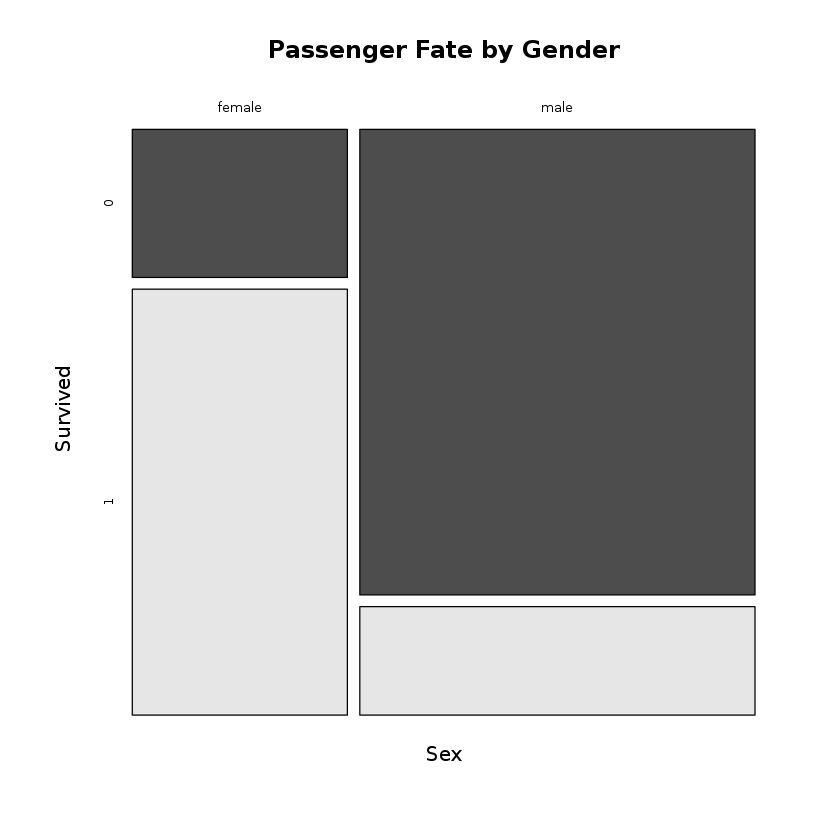

In [8]:
# Passenger Fate by Gender
mosaicplot(df.train$Sex ~ df.train$Survived, 
           main="Passenger Fate by Gender", shade=FALSE, color=TRUE, 
           xlab="Sex", ylab="Survived")

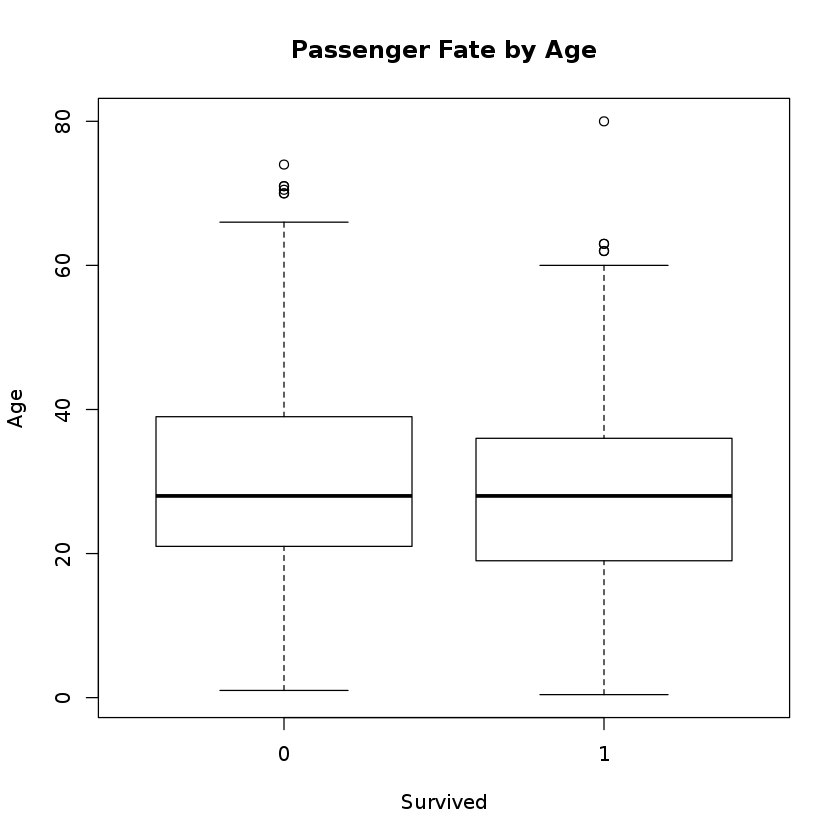

In [9]:
# Passenger Fate by Age
boxplot(df.train$Age ~ df.train$Survived, 
        main="Passenger Fate by Age",
        xlab="Survived", ylab="Age")

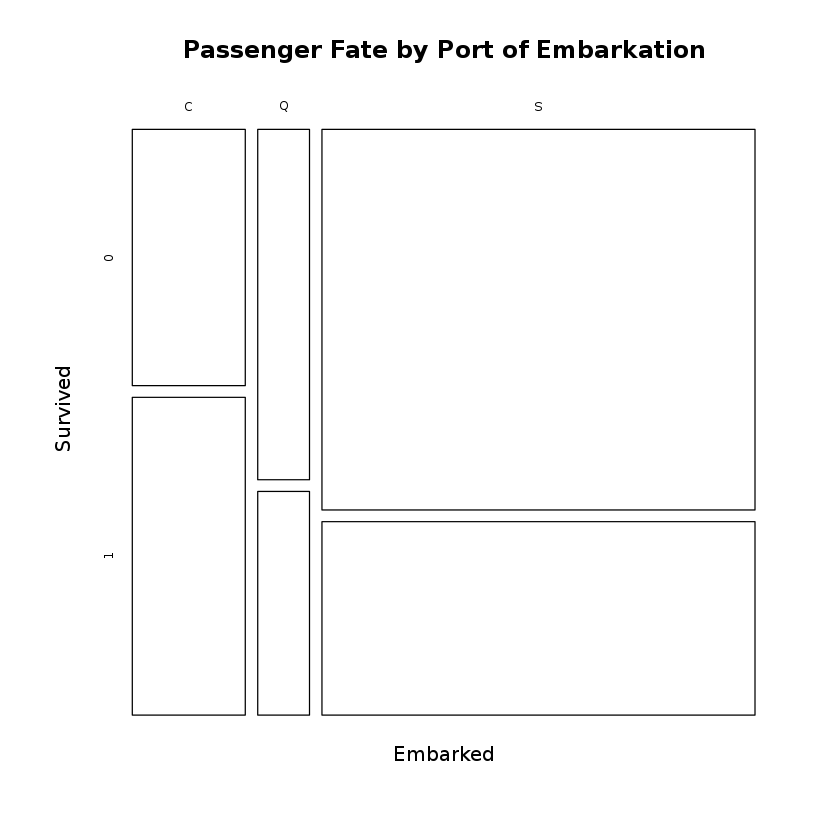

In [15]:
# Passenger Fate by Port of Embarkation
mosaicplot(df.train$Embarked ~ df.train$Survived, 
           main="Passenger Fate by Port of Embarkation",
           shade=FALSE, color=FALSE, xlab="Embarked", ylab="Survived")